<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EA%B9%80%EA%B3%A0%EC%9D%80/DIP_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np

In [2]:
def salt_n_pepper_noise(image, amount = 0.004, s_vs_p = 0.5):

# if 2 == len(image.shape):
#   row,col = image.shape
#   ch = 1

# else:
#   row, col, ch = image.shape

  # s_vs_p = 0.5
  # amount = 0.004

  out = np.copy(image)

  # Salt mode
  num_salt = np.ceil(amount * image.shape * s_vs_p)
  coords =[np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]

  out[type(coords)] = 1

  # Pepper mode
  num_pepper = np.ceil(amout * image.size * (1. - s_vs_p))
  # coords = [np.random.randint(0, i - 1, int(num_pepper))
  #   for i in image.shape]

  coords = [np.random.randint(0, i, int(num_salt))
            for i in image.shape]

  out[type(coords)] = 0

  return out

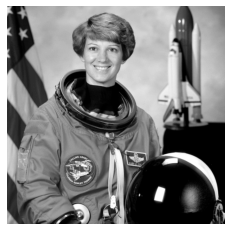

In [5]:
from skimage import data
# from skimage color import rgb2gry

from skimage import img_as_ubyte, img_as_float
import matplotlib.pyplot as plt

astro = data.astronaut()
astro = cv2.cvtColor(astro, cv2.COLOR_RGB2GRAY)

# Normalize to the range of 0~1
info = np.iinfo(astro.dtype)
astro = astro/info.max

plt.axis('off')
plt.imshow(astro, cmap='gray')

In [14]:
# s_vs_p = 0.5
s_vs_p = 0.99
# amount = 0.004
amount = 0.014

s_p_04 = salt_n_pepper_noise(astro,amount, s_vs_p)

plt.title('0.4%')
plt.axis('off')
plt.imshow(s_p_04, cmap='gray')

TypeError: ignored

In [12]:
import math

def mae(src,dst):
    return np.mean(np.abs(src-dst))

def mse(src,dst):
    return np.mean((src-dst)**2)

def sse(src,dst):
    return np.sum((src-dst)**2)

def rmse(src,dst):
    return np.sqrt(mse(src,dst))

def psnr(src,dst):
    mse = np.mean((src-dst)**2)
    if mse == 0:
        return math.inf
    MAX=1
    return 20* math.log10(MAX/math.sqrt(mse))

In [13]:
print('mae = {:.4f}'.format(mae(astro,s_p_04)))
print('mse = {:.4f}'.format(mse(astro,s_p_04)))
print('sse = {:.4f}'.format(sse(astro,s_p_04)))
print('rmse= {:.4f}'.format(rmse(astro,s_p_04)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_04)))

NameError: ignored

In [16]:
amount=0.004
s_p_04 = salt_n_pepper_noise(astro,amount,s_vs_p)

amount=0.04
s_p_4 = salt_n_pepper_noise(astro,amount,s_vs_p)

amount=0.4
s_p_40 = salt_n_pepper_noise(astro,amount,s_vs_p)


print('psnr= {:.4f}'.format(psnr(astro,s_p_40)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_4)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_04)))
print('psnr= {:.4f}'.format(psnr(astro,astro)))

plt.figure(figsize=(12,18))
plt.subplot(141), plt.title('40%'),plt.axis('off'),plt.imshow(s_p_40,cmap='gray')
plt.subplot(142), plt.title('4%'),plt.axis('off'),plt.imshow(s_p_4,cmap='gray')
plt.subplot(143), plt.title('0.4%'),plt.axis('off'),plt.imshow(s_p_04,cmap='gray')
plt.subplot(144), plt.title('original'),plt.axis('off'),plt.imshow(s_p_04,cmap='gray')

TypeError: ignored